<h1>Richardson-Lucy deconvolution of COSI continuum data</h1>

In [1]:
from COSIpy import *
import response
from fit import fit
# comment this out when doing your own thing
plt.style.use('thomas')

Welcome to JupyROOT 6.22/02


/Users/thomassiegert/MEGAlib/MEGAlib/external/root_v6.22.02/lib/ROOT/_facade.py:121: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  return _orig_ihook(name, *args, **kwds)


In [2]:
# comment this out when doing your own thing
plt.style.use('thomas')

<h3>Defining data (normal COSIpy workflow here):</h3>

In [77]:
# change this to your data set
data_dir = 'Crab_data/'
filename1 = 'Crab_data_33km_9dets.tra.gz'

<h3>Reading in data and plotting some info from the data set:</h3>

In [78]:
# create analysis object
analysis1 = COSIpy(data_dir,filename1)

In [5]:
# read in data (tra file)
analysis1.read_COSI_DataSet()

In [6]:
# define time bins
# I chose 1800 s because I found this as most useful from the spectral fits, etc.
# I suggest 1800 s in general for the entire balloon flight
Delta_T = 1800
analysis1.dataset.time_binning_tags(time_bin_size=Delta_T)

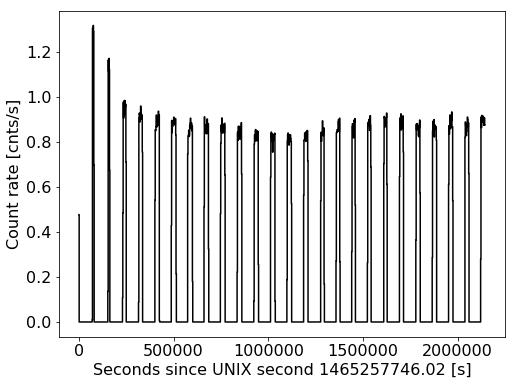

In [7]:
analysis1.plot_lightcurve()

In [9]:
# total exposure time
analysis1.dataset.times.total_time

553596.7616381645

In [10]:
# definition of energy bins (exactly as response right now)
energy_bin_edges=np.array([150,  220,  325,  480,  520,  765, 1120, 1650, 2350, 3450, 5000])

In [11]:
energy_bin_edges

array([ 150,  220,  325,  480,  520,  765, 1120, 1650, 2350, 3450, 5000])

In [12]:
# define energy and pixel binning
pixel_size = 6.
analysis1.dataset.init_binning(energy_bin_edges=energy_bin_edges,pixel_size=pixel_size)

In [13]:
# bin data
analysis1.dataset.get_binned_data()

Loop over time bins::   0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

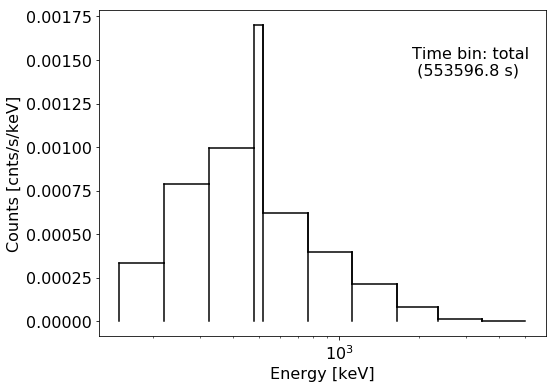

In [14]:
analysis1.dataset.plot_raw_spectrum()
plt.xscale('log')

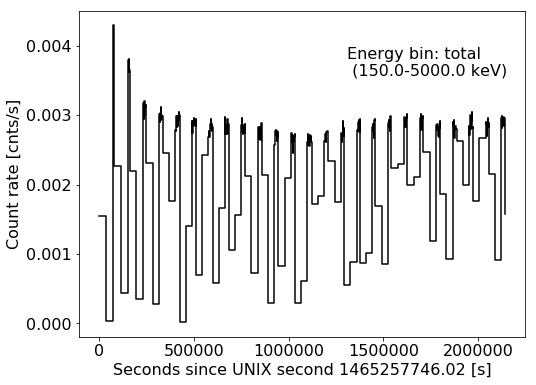

In [15]:
# light curve
analysis1.dataset.plot_lightcurve()

In [16]:
# definition of poitings (balloon stability + Earth rotation)
pointing1 = Pointing(dataset=analysis1.dataset,)

In [17]:
# Crab coordinates, use your object here
l1,b1 = 184.55746, -5.78436

Text(0, 0.5, 'Latitude [deg]')

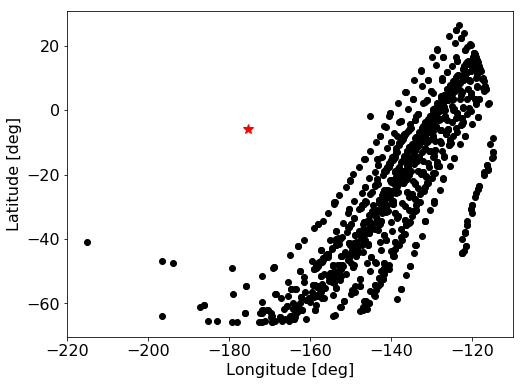

In [18]:
l_exp = pointing1.zpoins[:,0]
b_exp = pointing1.zpoins[:,1]

l_exp[l_exp > 0] -= 360

plt.plot(l_exp,b_exp,'o')
plt.plot(l1-360,b1,'*r',markersize=10)
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

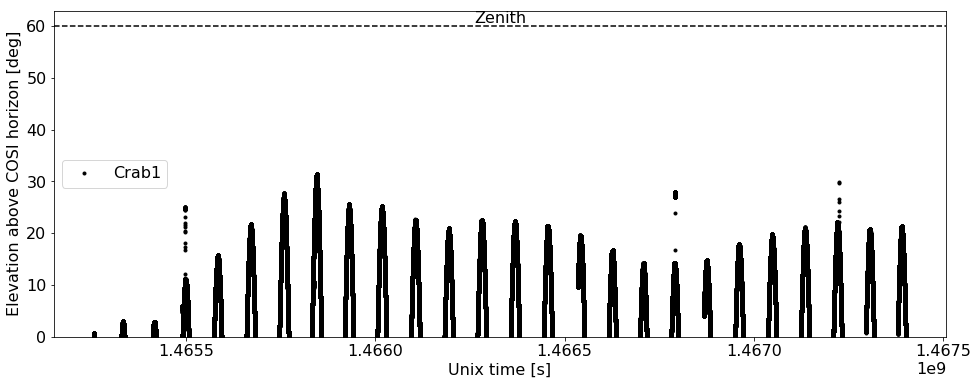

In [19]:
analysis1.plot_elevation([l1],[b1],['Crab1'])

<h3>For the background I choose 'default 6deg'. This means I use the flight data to define a background response. Alternatively, you can use 'sim 6deg despina' which is a background response created from simulations. There are pros and cons with both, but I found 'default 6deg' to produce the nicer image without many artefacts.</h3>

In [20]:
# background
background1 = BG(dataset=analysis1.dataset,mode='default 6deg')

Reading in flight-average background response for 6 deg CDS binning ...


<h3>Reading in response (quite large, though)</h3>

In [21]:
rsp = response.SkyResponse(filename='response/RegularResponseGrid_Continuum_10bins_v1.npz',pixel_size=6)

Reading complete continuum response. This might take a while...
Done.

Creating general RMF matrices, stay tuned...


Loop over phi bins::   0%|          | 0/30 [00:00<?, ?it/s]

Done.

Creating general IRF. Wait for it...
Done.

Deleting full matrix.
Done. Now have fun.


In [24]:
# respons dimensions
# lat x lon x phi x psi/chi x energy
rsp.rsp.response_grid_normed_efinal.shape

(30, 60, 30, 1145, 10)

<h3>Now comes the hard-coded part, where I haven't written tools yet, but some functions are available already:</h3>

In [25]:
from COSIpy_tools import get_image_response_from_pixelhit_hourly, zenaziGrid, one_func

<h3>Defining the sky sky to make images:</h3>

In [26]:
deg2rad = np.pi/180.

# we define our sky-grid on a regular 5x5 pixel grid for testing (later finer grid)
binsize = 6.
# l and b pixel edges
l_arrg = np.linspace(-180,180,int(360/binsize)+1)
b_arrg = np.linspace(-90,90,int(180/binsize)+1)
# number of pixels in l and b
n_l = int(360/binsize)
n_b = int(180/binsize)
# making a grid
L_ARRg, B_ARRg = np.meshgrid(l_arrg,b_arrg)
# choosing the centre points as representative
l_arr = l_arrg[0:-1]+binsize/2
b_arr = b_arrg[0:-1]+binsize/2
L_ARR, B_ARR = np.meshgrid(l_arr,b_arr)

# define solid angle for each pixel for normalisations later
domega = (binsize*deg2rad)*(np.sin(np.deg2rad(B_ARR+binsize/2)) - np.sin(np.deg2rad(B_ARR-binsize/2)))

<h3>Convert sky grid to zenith/azimuth pairs for all pointings:</h3>

In [27]:
# calculate the zeniths and azimuths on that grid for all times
zensgrid,azisgrid = zenaziGrid(pointing1.xpoins[:,0],pointing1.xpoins[:,1],
                               pointing1.ypoins[:,0],pointing1.ypoins[:,1],
                               pointing1.zpoins[:,0],pointing1.zpoins[:,1],
                               L_ARR.ravel(),B_ARR.ravel())
# reshape for next routines ... 
zensgrid = zensgrid.reshape(n_b,n_l,len(pointing1.xpoins))
azisgrid = azisgrid.reshape(n_b,n_l,len(pointing1.xpoins))

In [28]:
zensgrid.shape

(30, 60, 1991)

<h3>Define a background tracer from the data:</h3>

In [29]:
tracer = np.sum(analysis1.dataset.binned_data,axis=(1,2,3))
tracer = tracer/np.mean(tracer)

In [30]:
# background with tracer (making the zeros zero)
background1 = BG(dataset=analysis1.dataset,mode='default 6deg',tracer=tracer)

Reading in flight-average background response for 6 deg CDS binning ...


<h3>Getting the observation indices where we actually have measured photons (important for later):</h3>

In [31]:
nonzero_idx = background1.calc_this[2]
nonzero_idx.shape

(2525,)

<h3>Function to get the response of an image for arbitrary time binning:</h3>

In [32]:
def get_image_response_from_pixelhit_general(Response,zenith,azimuth,dt,n_hours,binsize=6,cut=60,altitude_correction=False,al=None):
    """
    Get Compton response from hit pixel for each zenith/azimuth vector(!) input.
    Binsize determines regular(!!!) sky coordinate grid in degrees.

    :param: zenith        Zenith positions of all points of predefined sky grid with
                          respect to the instrument (in deg)
    :param: azimuth       Azimuth positions of all points of predefined sky grid with
                          respect to the instrument (in deg)
    :option: binsize      Default 5 deg (matching the sky dimension of the response). If set
                          differently, make sure it matches the sky dimension as otherwise,
                          false results may be returned
    :option: cut          Threshold to cut the response calculation after a certain zenith angle.
                          Default 60
    :param: n_hours       Number of hours in cdxervation
    :option: altitude_correction Default False: use interpolated transmission probability, normalised to 33 km and 500 keV,
                          to modify number of expected photons as a function of altitude and zenith angle of cdxervation
    :option: al           Altitude values according to dt from construct_pointings(); used of altitude_correction is set to True
    """

    # assuming useful input:
    # azimuthal angle is periodic in the range [0,360[
    # zenith ranges from [0,180[

    # check which pixel (index) was hit on regular grid
    hit_pixel_zi = np.floor(zenith/binsize)
    hit_pixel_ai = np.floor(azimuth/binsize)

    # and which pixel centre
    hit_pixel_z = (hit_pixel_zi+0.5)*binsize
    hit_pixel_a = (hit_pixel_ai+0.5)*binsize

    # check which zeniths are beyond threshold
    bad_idx = np.where(hit_pixel_z > cut)

    # set hit pixels to output array
    za_idx = np.array([hit_pixel_zi,hit_pixel_ai]).astype(int)

    nz = zenith.shape[2]

    n_lon = int(360/binsize)
    n_lat = int(180/binsize)
    
    l_arrg = np.linspace(-180,180,int(360/binsize)+1)
    b_arrg = np.linspace(-90,90,int(180/binsize)+1)
    L_ARRg, B_ARRg = np.meshgrid(l_arrg,b_arrg)
    l_arr = l_arrg[0:-1]+binsize/2
    b_arr = b_arrg[0:-1]+binsize/2
    L_ARR, B_ARR = np.meshgrid(l_arr,b_arr)

    # take care of regular grid by applying weighting with latitude
    #weights = ((binsize*np.pi/180)**2*np.cos(np.deg2rad(B_ARR))).repeat(nz).reshape(n_lat,n_lon,nz)
    weights = ((binsize*np.pi/180)*(np.sin(np.deg2rad(B_ARR+binsize/2)) - np.sin(np.deg2rad(B_ARR-binsize/2)))).repeat(nz).reshape(n_lat,n_lon,nz)
    weights[bad_idx] = 0

    
    # check for negative weights and indices and remove
    weights[za_idx[0,:] < 0] = 0.
    weights[za_idx[1,:] < 0] = 0.
    za_idx[0,za_idx[0,:] < 0] = 0.
    za_idx[1,za_idx[1,:] < 0] = 0.
    
    
    if altitude_correction == True:
        altitude_response = return_altitude_response()
    else:
        altitude_response = one_func

    # get responses at pixels
   
    #print('weights',weights.shape)
    #print('response',Response.shape)
    #print('dt',dt.shape)
    
    image_response = np.zeros((n_hours,n_lat,n_lon,Response.shape[2]))

    for c in tqdm(range(n_hours)):
        cdx = np.where((pointing1.cdtpoins > analysis1.dataset.times.times_min[analysis1.dataset.times.n_ph_dx[c]]) &
                       (pointing1.cdtpoins <= analysis1.dataset.times.times_max[analysis1.dataset.times.n_ph_dx[c]]))[0]

        #print('in loop response',Response[za_idx[0,:,:,cdx],za_idx[1,:,:,cdx],:].shape)
        #print('in loop weights',weights[:,:,cdx,None].shape)
        #print('in loop weights switched',np.einsum('klij->iklj', weights[:,:,cdx,None]).shape)
        
        # this calculation is basically a look-up of the response entries. In general, weighting (integration) with the true shape can be introduced, however with a lot more computation time (Simpson's rule in 2D ...)
        #altitude_weights = altitude_response(zenith[:,:,cdx].ravel(),al[cdx])[np.argsort(np.argsort(zenith[:,:,cdx].ravel()))].reshape(n_lat,n_lon)
        image_response[c,:,:,:] += np.sum(Response[za_idx[0,:,:,cdx],za_idx[1,:,:,cdx],:]*np.einsum('klij->iklj', weights[:,:,cdx,None])*dt[cdx,None,None,None],axis=0)#*altitude_weights[:,:,None]

    return image_response


<h1>Selection of the energy bin to make an image of. The response will be restricted to this one energy bin:</h1>

In [33]:
# ebin 2: highest effective area and flux
ebin = 2

sky_response_CDS = rsp.rsp.response_grid_normed_efinal.reshape(
    n_b,
    n_l,
    analysis1.dataset.phis.n_phi_bins*\
    analysis1.dataset.fisbels.n_fisbel_bins,
    10)[:,:,nonzero_idx,2]

In [34]:
# reduced response dimensions:
# lat x lon x CDS
sky_response_CDS.shape

(30, 60, 2525)

<h1>Calculation of the general response for the current data set.<br>
    This has to be done only once (for the data set).<br>
    Might take a few minutes.</h1>

In [35]:
sky_response_scaled = get_image_response_from_pixelhit_general(
    Response=sky_response_CDS,
    zenith=zensgrid,
    azimuth=azisgrid,
    dt=pointing1.dtpoins,
    n_hours=analysis1.dataset.times.n_ph,
    binsize=6.,
    cut=60.,
    altitude_correction=False,
    al=np.ones(len(pointing1.dtpoins)))

  0%|          | 0/308 [00:00<?, ?it/s]

In [40]:
# data-set-specific response dimensions
# times x lat x lon x CDS
sky_response_scaled.shape

(308, 30, 60, 2525)

<h3>Saving that data-set-specific response for later use:</h3>

In [36]:
import h5py

In [37]:
with h5py.File('response0325-0480_6degCDS_6degSky_9det_COSI2016_reduced_bgflight_new.h5', 'w') as hf:
    hf.create_dataset("response_continuum",  data=sky_response_scaled)

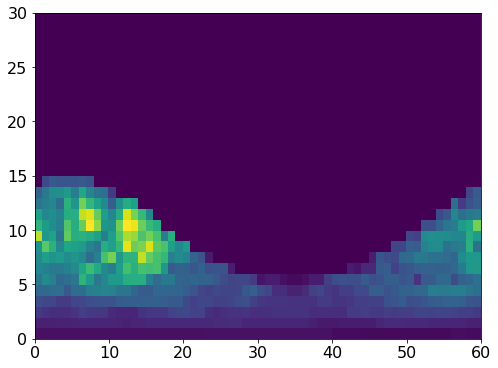

In [50]:
# random test plot
# it basically shows the probability of a count measured at t=188 and
# CDS bin number 800 (whatever combination of phi/psi/chi that is) to 
# originate from a certain position in the sky
plt.pcolormesh(sky_response_scaled[188,:,:,800])

<h3>Calculation of the 'exposure map', i.e. the response weighted by time:</h3>

In [51]:
expo_map_crab = np.zeros((n_b,n_l))
for i in tqdm(range(308)):
    expo_map_crab += np.sum(sky_response_scaled[i,:,:,:],axis=2)

  0%|          | 0/308 [00:00<?, ?it/s]

<h3>Plotting the exposure map weighted with the pixel size:</h3>

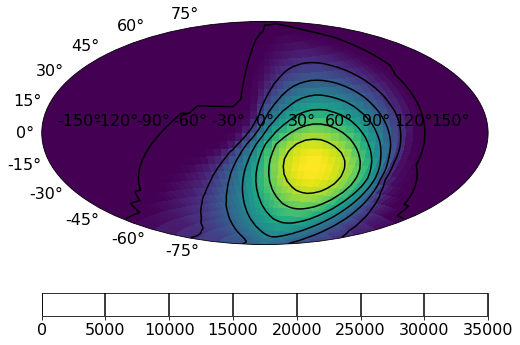

In [52]:
plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,np.roll(expo_map_crab/domega,axis=1,shift=30))
plt.contour(L_ARR*deg2rad,B_ARR*deg2rad,np.roll(expo_map_crab/domega,axis=1,shift=30),colors='black')
plt.colorbar(orientation='horizontal')

In [53]:
expo_map_crab.shape

(30, 60)

<h1>Begin Richardson-Lucy here:</h1>

<h3>Define regions of the sky that we actually cannot see:</h3>

In [55]:
# here I select everything, i.e. we have no bad exposure
bad_expo = np.where(expo_map_crab/domega < 0)

<h3>Define function for a starting map fo the RL deconvolution. I choose an isotropic map, i.e. everything gets the same value:</h3>

In [56]:
def IsoMap(ll,bb,A0,binsize=6):
    shape = np.ones(ll.shape)
    norm = np.sum(shape*(binsize*np.pi/180)*(np.sin(np.deg2rad(bb+binsize/2)) - np.sin(np.deg2rad(bb-binsize/2))))
    val = A0*shape/norm
    return val

<h3>Define suitable background time nodes (from previous notebooks:</h3>

In [57]:
# based on another notebook
all_edges = np.array([0,1,6,12,23,35,39,49,64,70,79,93,107,121,135,149,163,176,187,199,210,221,231,243,256,270,281,294,306])

<h3>add time nodes to the current background model:</h3>

In [58]:
background1.make_bg_cuts(list(all_edges+1))

<h3>Number of time bins (should be the first dimension of the response; change accordingly):</h3>

In [59]:
d2h = 308

In [60]:
from COSIpy_tools import cashstat

<h3>Select only one enery bin (as above) for data set:</h3>

In [61]:
crab_dataset = analysis1.dataset.binned_data[:,ebin,:,:].reshape(d2h,30*1145)[:,nonzero_idx]

<h3>Same for background:</h3>

In [62]:
background_model = background1.bg_model_reduced[ebin]

<h3>Check for consistency of data and background:</h3>

In [63]:
crab_dataset.shape,background_model.shape

((308, 2525), (308, 2525))

<h3>Must have the same dimensions. If not, it won't work</h3>

<h3>Define background model cuts, indices, and resulting number of cuts:</h3>

In [64]:
bg_cuts, idx_arr, Ncuts = background1.bg_cuts, background1.idx_arr, background1.Ncuts

<h3>For my modified RL algorithm to work we need to load a stan model that fits background plus two images (the current image plus a delta image given by the RL formalism):</h3>

In [65]:
import pickle
import pywt

In [67]:
#read filename.pkl (if already compiled)
# this might not work for you, let me know if there is a problem here

try:
    #read COSImodefit.pkl (if already compiled)
    model_multimap = pickle.load(open('fit_COSI_conved_2D_new2_multimap_indivBG.pkl', 'rb'))

except:
    print('Model not yet compiled, doing that now (might take a while).')
    ## compile model (if not yet compiled):
    model_multimap = pystan.StanModel('fit_COSI_conved_2D_new2_multimap_indivBG.stan')

    ## save it to the file 'filename.pkl' for later use
    with open('../fit_COSI_conved_2D_new2_multimap_indivBG.pkl', 'wb') as f:
        pickle.dump(model_multimap, f)




<h3>Use the fitted background parameters from the previous notebook as starting guess for the RL iterations:</h3>

In [68]:
# change these values to your fit results
fitted_bg = np.array([0.88,0.92,0.93,0.93,0.93,0.93,0.88,0.90,0.93,0.88,0.91,0.90,0.90,0.91,0.90,0.90,0.91,0.90,0.91,0.88,0.90,0.92,0.91,0.89,0.90,0.89,0.87,0.90,0.96])

In [69]:
fitted_bg.shape

(29,)

<h1>Richardson-Lucy algorithm (individual steps explained in code):</h1>

Convolving with response (init expectation), iteration 0


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Calculating Delta image, iteration 1, numerator


  0%|          | 0/308 [00:00<?, ?it/s]

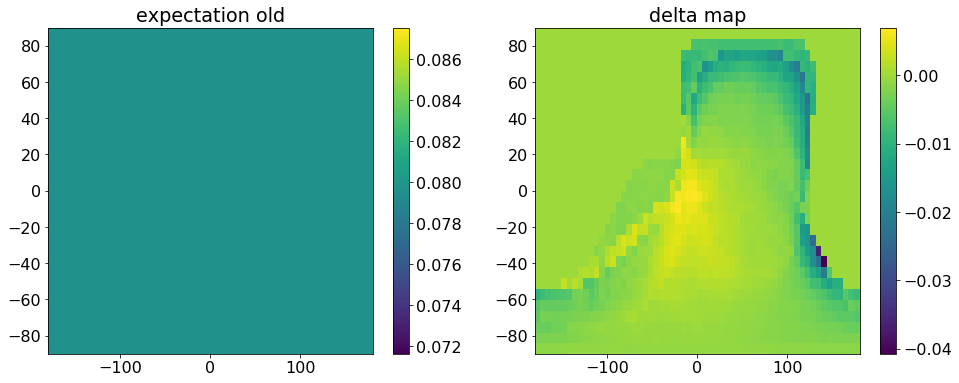

Convolving Delta image, iteration 1


  0%|          | 0/30 [00:00<?, ?it/s]

Finding maximum acceleration parameter, iteration 1
Maximum acceleration parameter found:  1.953
Fitting delta-map in addition to old map, iteration 1
Saving new map, and fitted parameters, iteration 1
Calculating Delta image, iteration 2, numerator


  0%|          | 0/308 [00:00<?, ?it/s]

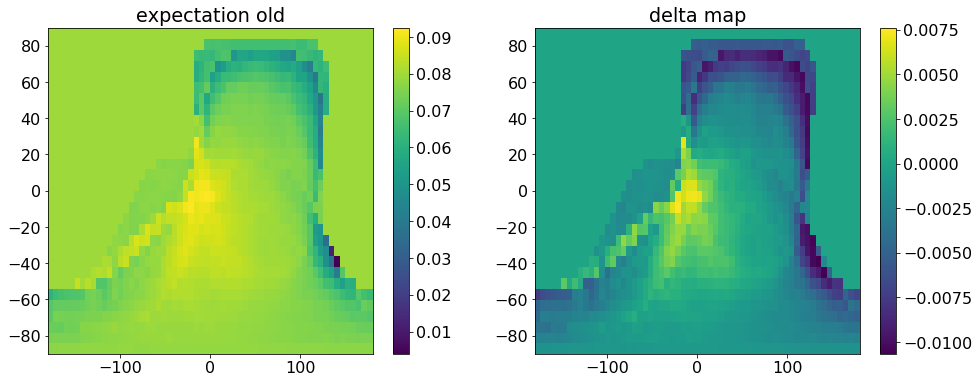

Convolving Delta image, iteration 2


  0%|          | 0/30 [00:00<?, ?it/s]

Finding maximum acceleration parameter, iteration 2
Maximum acceleration parameter found:  1.96
Fitting delta-map in addition to old map, iteration 2
Saving new map, and fitted parameters, iteration 2
Initial log joint probability = -225597
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       -225554     0.0211296       4.38048           1           1       22   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      39       -225553     0.0735018        3.2835           1           1       42   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       -225553      0.202465      0.571797      0.2003           1       63   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       -225553      0.112567     0.0576282      0.3597           1       84   
Optimization terminated normally: 
  Conver

In [70]:
# initial map (isotropic flat, small value)
map_init = IsoMap(L_ARR,B_ARR,1)

# other initial conditions (not needed here)
#map_init = five11keV_map_240mu*n_days
#map_init[bad_expo[0],bad_expo[1]] = 0

# define background (to be sure it's the same as before)
bg_cuts, idx_arr, Ncuts = background1.bg_cuts, background1.idx_arr, background1.Ncuts

# number of RL iterations (100 should give you a pretty converged image)
iterations = 3

# that's a scalling factor for the 'Delta map', allowing it to be 1000
# times stronger than the original RL algorithm suggests (cf Knoedlseder+1997)
afl_scl = 1000.

# initialise arrays to save images and other parameters to
# maps per iteration
map_iterations = np.zeros((n_b,n_l,iterations))
# likelihood of maps (vs. initial i.e. basically only background)
map_likelihoods = np.zeros(iterations)
# fit likelihoods
intermediate_lp = np.zeros(iterations)
# acceleration parameters
acc_par = np.zeros(iterations)
# background parameters
bg_pars = np.zeros((iterations,Ncuts))

# as zeroth iteration, copy initial map to become the 'old map' (see below)
map_old = map_init
# cf. Knoedlseder+1997 what the values denominator etc are
denominator = expo_map_crab

# zeroth iteration is then just the initial map
map_iterations[:,:,0] = map_old

# convolve this map with the response
expectation_init = 0
print('Convolving with response (init expectation), iteration 0')
for i in tqdm(range(n_b)):
    for j in range(n_l):
        expectation_init += sky_response_scaled[:,i,j,:]*map_init[i,j]

# set old expectation (in data space bins) to new expectation (convolved image)
expectation_old = expectation_init
        
###########################################################
###########################################################
## here run over the number of iterations #################
###########################################################
## the time for the convolutions is very large ############
## this can be 10 minutes (!) per iteration ###############
## this should be tested for a few iterations #############
## and then run over night or similar #####################
###########################################################
###########################################################
for its in tqdm(range(1,iterations)):
    
    # setting the map to zero where we selected a bad exposure (we didn't, but to keep it general)
    map_old[bad_expo[0],bad_expo[1]] = 0
    # check for each pixel to be finite
    map_old[np.where(np.isnan(map_old) == True)] = 0
    
    # make new background for the next iteration
    bg_cuts, idx_arr, Ncuts = background1.bg_cuts, background1.idx_arr, background1.Ncuts
    
    # temporary background model
    tmp_model_bg = np.zeros((d2h,background1.bg_model_reduced[ebin].shape[1]))
    
    # there could be something different for the first iteration (here it isn't, same function call)
    if its == 1:
        for g in range(d2h):
            tmp_model_bg[g,:] = background_model[g,:]*fitted_bg[idx_arr-1][g]
    else:
        for g in range(d2h):
            tmp_model_bg[g,:] = background_model[g,:]*fitted_bg[idx_arr-1][g]
            
    # expectation (in data space) is the image (expectation_old) plus the background (tmp_model_bg)
    expectation_tot_old = expectation_old + tmp_model_bg 

    # calculate likelihood of currect total expectation
    map_likelihoods[its-1] = cashstat(crab_dataset.ravel(),expectation_tot_old.ravel())
    
    # calculate numerator of RL algorithm
    numerator = 0
    print('Calculating Delta image, iteration '+str(its)+', numerator')
    for i in tqdm(range(d2h)):
        for j in range(crab_dataset.shape[1]):
            numerator += (crab_dataset[i,j]/expectation_tot_old[i,j]-1)*sky_response_scaled[i,:,:,j]
            # denominator could be different (not the case here)
            #denominator += (sky_response_scaled[i,:,:,j]**2/expectation_tot_old[i,j])
    
    # calculate delta map (denominator scaled by fourth root to avoid exposure edge effects)
    delta_map_tot_old = (numerator/denominator)*map_old*(denominator)**0.25
    # alternatively, could smooth it (not used here)
    #delta_map_tot_old = smooth((numerator/denominator)*map_old*np.sqrt(denominator),0.5)
    
    # check again for finite values and zero our bad exposure regions
    nan_idx = np.where(np.isnan(delta_map_tot_old) == 1)
    delta_map_tot_old[nan_idx[0],nan_idx[1]] = 0
    delta_map_tot_old[bad_expo[0],bad_expo[1]] = 0

    # the plots are not required, but I like to see how the algorithm is doing
    # so that I could stop prematurely when the image isnt changing any more
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    plt.pcolormesh(L_ARRg,B_ARRg,np.roll(map_old,axis=1,shift=30))
    plt.colorbar()
    plt.title('expectation old')
    plt.subplot(122)
    plt.pcolormesh(L_ARRg,B_ARRg,np.roll(delta_map_tot_old,axis=1,shift=30))
    plt.title('delta map')
    plt.colorbar()
    plt.show()
    
    # convolve delta image
    print('Convolving Delta image, iteration '+str(its))
    conv_delta_map_tot = 0
    for i in tqdm(range(n_b)):
        for j in range(n_l):
            conv_delta_map_tot += sky_response_scaled[:,i,j,:]*delta_map_tot_old[i,j]
    
    # find maximum acceleration parameter to multiply delta image with
    # so that the total image is still positive everywhere
    print('Finding maximum acceleration parameter, iteration '+str(its))
    try:
        len_arr = []
        for i in range(0,10000):
            len_arr.append(len(np.where((map_old+delta_map_tot_old*i/afl_scl) < 0)[0]))
        len_arr = np.array(len_arr)
        afl = np.max(np.where(len_arr == 0)[0])
        print('Maximum acceleration parameter found: ',afl/afl_scl)

        
        # fit delta map and current map to speed up RL algorithm
        print('Fitting delta-map in addition to old map, iteration '+str(its))
        # dictionary for data set and prior
        # note that here the value for N should be your response CDS dimension
        # should be last dimension of the scaled response thing (change to your value)
        data_multimap = dict(N = 2525,
                     Nh = d2h,
                     Ncuts = Ncuts,
                     Nsky = 2,
                     acceleration_factor_limit=afl*0.95,
                     bg_cuts = bg_cuts,
                     bg_idx_arr = idx_arr,
                     y = crab_dataset.ravel().astype(int),
                     bg_model = tmp_model_bg,
                     conv_sky = np.concatenate([[expectation_old],[conv_delta_map_tot/afl_scl]]),
                     mu_flux = np.array([1,afl/2]),
                     sigma_flux = np.array([1e-2,afl]),
                     mu_Abg = fitted_bg,
                     sigma_Abg = np.repeat(0.1,Ncuts))

        # fit;
        # i tested something here, but doesn't matter
        #fitBG = modelBG.sampling(data=data2D,chains=1,iter=1000,n_jobs=-1,pars=['Abg'])# only 1 chain because it kills my RAM otherwise
        # initial values for fit (somewhat sensitive here with COSI data)
        init = {}
        init['flux'] = np.array([1.,afl/2.])
        init['Abg'] = np.repeat(0.99,Ncuts)
        # fit: might take some time but it shouldn't be more than a minute
        op2D = model_multimap.optimizing(data=data_multimap,init=init,as_vector=False,verbose=True,
                                                tol_rel_grad=1e3,tol_obj=1e-20)

        # save values
        print('Saving new map, and fitted parameters, iteration '+str(its))
        intermediate_lp[its-1] = op2D['value']
        acc_par[its-1] = op2D['par']['flux'][1]
        bg_pars[its-1,:] = op2D['par']['Abg']
  
        # make new map as old map plus scaled delta map
        map_new = map_old+op2D['par']['flux'][1]*delta_map_tot_old/afl_scl
    
        # same with expectation (data space)
        expectation_new = expectation_old + op2D['par']['flux'][1]*conv_delta_map_tot/afl_scl
        
        # that's an alternative way, not used here
        """N_t = 25
        cstat_arr = np.zeros((N_t*4,N_t))
        bg_arr = np.linspace(0.95,1.1,N_t*4)
        lambda_arr = np.linspace(afl_scl,afl,N_t)

        for i in tqdm(range(N_t*4)):
            for j in range(N_t):
                cstat_arr[i,j] = cashstat(crab_dataset.ravel().astype(int),
                                          background_model.ravel()*n_days*bg_arr[i] +\
                                          expectation_old.ravel() +\
                                          conv_delta_map_tot.ravel()/afl_scl*lambda_arr[j])
                
        intermediate_min = np.where(minmin(cstat_arr) == 0)

        print('Saving new map, and fitted parameters, iteration '+str(its))
        print('intermediate minimum bg, lambda: ',bg_arr[intermediate_min[0][0]],lambda_arr[intermediate_min[1][0]]/afl_scl)
        acc_par[its-1] = lambda_arr[intermediate_min[1][0]]#op2D['par']['flux'][1]
        bg_pars[its-1,:] = bg_arr[intermediate_min[0][0]]#op2D['par']['Abg']

        map_new = map_old + lambda_arr[intermediate_min[1][0]]*delta_map_tot_old/afl_scl"""

    except:
        # if the fit failed...
        # this shouldn't happen too often (or at all)
        print('############## Fit failed! proceeding without acceleration ##############')
        map_new = map_old+delta_map_tot_old
        expectation_new = expectation_old + conv_delta_map_tot
        #map_new = map_old + np.random.rand(expo_map_crab.shape[0],expo_map_crab.shape[1])*np.median(map_old)*0.001
        
    #map_new[bad_expo[0],bad_expo[1]] = 0
    
    # check finite values again
    if its == 1:
        bad_index_init = np.where(np.isnan(map_new) == True)
    
    # also here
    map_new[bad_expo[0],bad_expo[1]] = 0
    map_new[np.where(np.isnan(map_new) == True)] = 0
    map_iterations[:,:,its] = map_new

    # swap maps
    map_old = map_new
    
    # and expectations
    expectation_old = expectation_new
    
    
    # and repeat




<h1>Plotting some results:</h3>

<h3>Plotting the likelihood ratio test of all the iterations with the first one (basically BG only):</h3>

(0, 180)

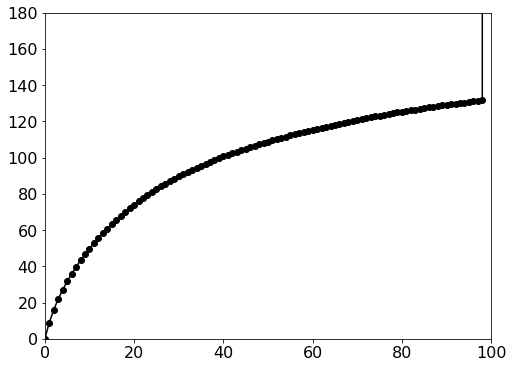

In [181]:
plt.plot(np.abs(map_likelihoods-map_likelihoods.max()),'o-')
plt.xlim(0,100)
plt.ylim(0,180)
plt.xlabel('Iteration')
plt.ylabel('TS')

<h3>Calculating the fluxes of the <em>total</em> maps<br>
    If flux at position is to be calculated, select central pixel and 8 neighbouring pixels around that.</h3>

In [178]:
map_fluxes = np.zeros(iterations)
for i in range(iterations):
    map_fluxes[i] = np.sum(map_iterations[:,:,i]*domega)

# this is units of ph/keV
# if you want per sr per sec and integreate over keV apply also
# /domega/analysis1.dataset.times.total_time*(480-325)

(0, 100)

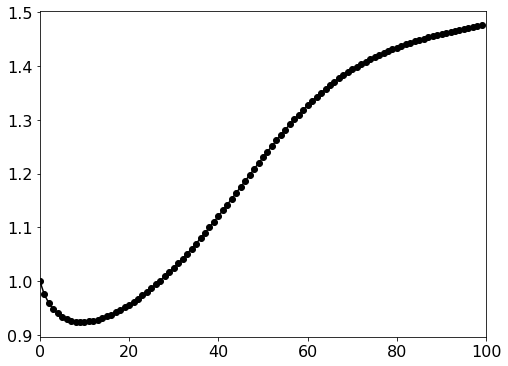

In [182]:
plt.plot(map_fluxes,'o-')
plt.xlim(0,100)
plt.xlabel('Iteration')
plt.ylabel('Flux [ph/keV]')

<h3>Background parameters:</h3>

In [71]:
bg_pars.shape

(3, 29)

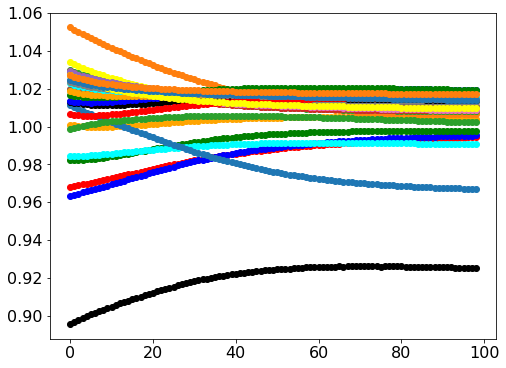

In [185]:
plt.plot(bg_pars[0:99,:],'o-');
plt.xlabel('Iteration')
plt.ylabel('Background parameter scaling')

<h3>Plot a map:</h3>

In [72]:
from matplotlib import colors

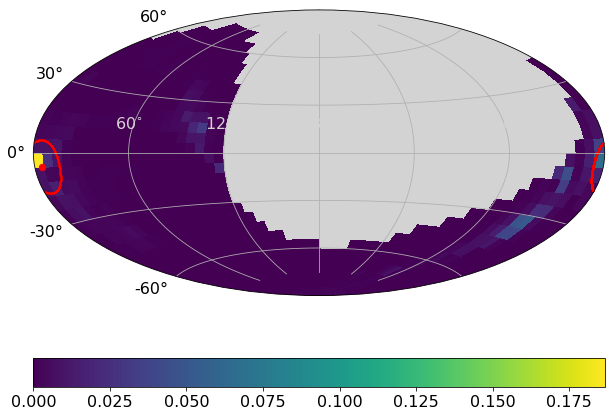

In [213]:
# chosen iteration
it = 98

plt.figure(figsize=(10.24,7.68))

plt.subplot(projection='aitoff')
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               # the np.roll is to centre the map at l=180 if needed
               np.roll(map_iterations_nan[:,:,it]/domega,axis=1,shift=0)/analysis1.dataset.times.total_time*(480-325),
               cmap=plt.cm.viridis,
               norm=colors.PowerNorm(1),
               rasterized=True)


# grid every 60 deg
plt.xticks(np.array([-120,-60,0,60,120])*deg2rad,labels=[r'$60^{\circ}$'+'\n',
                                                         r'$120^{\circ}$'+'\n',
                                                         r'$180^{\circ}$'+'\n',
                                                         r'$-120^{\circ}$'+'\n',
                                                         r'$-60^{\circ}$'+'\n'],color='lightgray')
# grid every 30 deg
plt.yticks(np.array([-60,-30,0,30,60])*deg2rad)


#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
plt.grid()
plt.colorbar(orientation='horizontal')

# ARM width = 11 deg, your source should fall into that ring
fov = circle_on_the_sky(l1-360,b1,11,n_points=1000)
fov2 = circle_on_the_sky((l1+180)-360,b1,11,n_points=1000)

#plt.scatter((l1-180)*deg2rad,b1*deg2rad,c='red',s=100,marker='*')
plt.scatter(np.deg2rad(fov[0]-180*0),np.deg2rad(fov[1]),color='red',marker='.',s=1)
plt.scatter(np.deg2rad(fov2[0]-180*0)+np.pi,np.deg2rad(fov[1]),color='red',marker='.',s=1)
plt.scatter(np.deg2rad(l1-180*2),np.deg2rad(b1),color='red',marker='o',s=40)

<h3>Some more plots and video:</h3>

In [198]:
# my chosen map here is iteration 98
it = 98
map_crab = map_iterations_nan[:,:,it]
#map_crab[13,1] = 1e-2 # instead using a map with zeros and 1 high point

In [199]:
# concolve this map
conv_map = 0
for i in tqdm(range(n_b)):
    for j in range(n_l):
        if np.isfinite(map_crab[i,j]) == True:
            conv_map += sky_response_scaled[:,i,j,:]*map_crab[i,j]
            

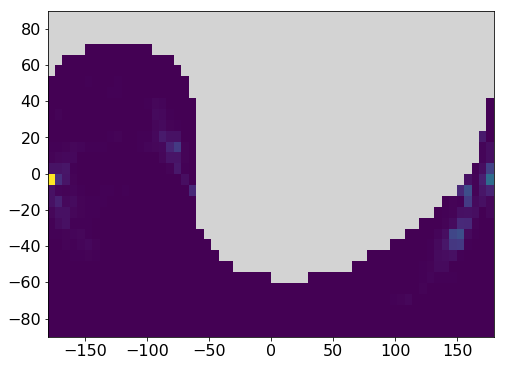

In [200]:
# once again plot this map
plt.pcolormesh(L_ARRg,B_ARRg,map_crab)

AttributeError: 'SkyResponse' object has no attribute 'sky_response'

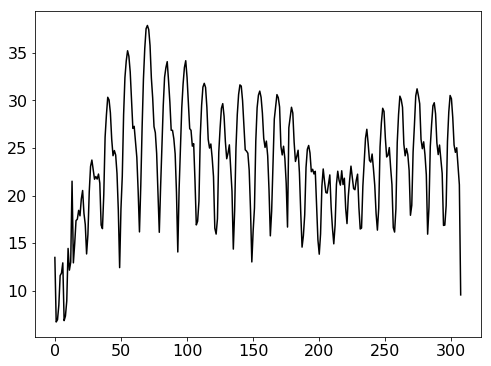

In [201]:
# plot the response of the map as a function of time
# this should clearly show ups and downs when the source is strongly seen (zenith)
# and weakly seen (edge of fov)
plt.plot(np.sum(conv_map,axis=1),label='conv pixel lookup')
#plt.plot(np.sum(rsp.sky_response[2],axis=1)*np.sum(conv_map),label='PS response lookup')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Expected counts')

<h3>And making a video out of the iterations:</h3>

In [73]:
from IPython.display import Image
from IPython.display import Video
from tqdm.autonotebook import tqdm
from matplotlib import animation

In [75]:
cmap = plt.get_cmap('viridis')
# bad exposures will be gray
cmap.set_bad('lightgray')

In [189]:
# select here which pixels should be gray
map_iterations_nan = np.copy(map_iterations)
# I select also non-zero expoures here to be gray (avoiding the edge effects)
bad_expo = np.where(expo_map_crab/domega < 1e3)
for i in range(100):
    map_iterations_nan[bad_expo[0],bad_expo[1],i] = np.nan

In [76]:
# crab
l1-360

-175.44254

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size (inches) has been adjusted from 10.24 x 7.68 to 10.222222222222221 x 7.666666666666667
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '736x552', '-pix_fmt', 'rgba', '-r', '20.0', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'RLstandard_COSI2016_Crab_dT1800s_29BGpars_bgflight_100iters.mp4']


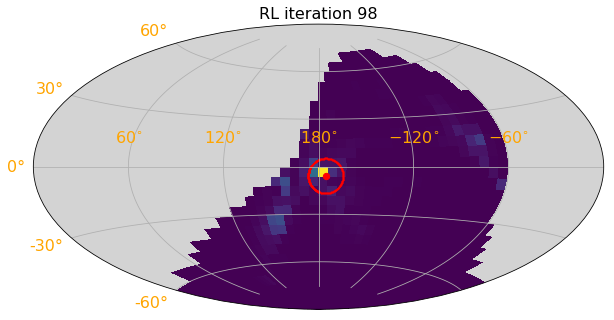

In [193]:
# plotting for video

fig, ax = plt.subplots(figsize=(10.24,7.68),subplot_kw={'projection':'aitoff'},nrows=1,ncols=1)

ax.set_xticks(np.array([-120,-60,0,60,120])*deg2rad)
ax.tick_params(axis='x', colors='orange')
ax.set_xticklabels([r'$60^{\circ}$'+'\n',
                                                         r'$120^{\circ}$'+'\n',
                                                         r'$180^{\circ}$'+'\n',
                                                         r'$-120^{\circ}$'+'\n',
                                                         r'$-60^{\circ}$'+'\n'])
ax.set_yticks(np.array([-60,-30,0,30,60])*deg2rad)
ax.tick_params(axis='y', colors='orange')

#plt.xlabel('Gal. Lon. [deg]')
#plt.ylabel('Gal. Lat. [deg]')
#ax.grid()


fov = circle_on_the_sky(l1-360,b1,11,n_points=1000)
fov2 = circle_on_the_sky((l1+180)-360,b1,11,n_points=1000)


# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

ims = []
for i in tqdm(range(99)):
    ttl = plt.text(0.5, 1.01, r'RL iteration {0:1.0f}'.format(i), horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    img = ax.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
                        np.roll(map_iterations_nan[:,:,i],axis=1,shift=30),
                        cmap=cmap)
    ims.append([img,
                ax.scatter(np.deg2rad(fov[0])-np.pi,np.deg2rad(fov[1]),color='red',marker='.',s=0.5),
                ax.scatter(np.deg2rad(fov2[0])+np.pi-np.pi,np.deg2rad(fov[1]),color='red',marker='.',s=0.5),
                ax.scatter(np.deg2rad(l1-180),np.deg2rad(b1),color='red',marker='o',s=40),
                ttl])

#fig.colorbar(img,orientation='horizontal')
    
ax.grid()
    
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=0)

ani.save('RLstandard_COSI2016_Crab_dT1800s_29BGpars_bgflight_100iters.mp4')

In [194]:
# showing the video in line here
Video('RLstandard_COSI2016_Crab_dT1800s_29BGpars_bgflight_100iters.mp4')

<h3>Saving the chosen iteration as fits file:</h3>

In [242]:
l_arr[30],b_arr[15]

(3.0, 3.0)

In [214]:
from astropy.io import fits

In [261]:
from astropy import wcs
wcs = wcs.WCS(naxis=2)
nx = 60
ny = 30
pixscalelon = np.diff(l_arr)[0] # cdelt1
pixscalelat = np.diff(b_arr)[0]  # cdelt2

# smaller selection
#small = np.where((np.abs(L_ARR) < 25) & (np.abs(B_ARR) < 25))

wcs.wcs.crpix = [30.5, 15.5] # Ref pixel for axis 1 and 2
wcs.wcs.cdelt = np.array([pixscalelon, pixscalelat]) # what is the pixel scale in lon, lat.
wcs.wcs.crval = [l_arr[30],b_arr[15]] #what is the galactic coordinate of that pixel.
wcs.wcs.ctype = ["GLON-CAR", "GLAT-CAR"] #CAR projection #AIT projection

In [262]:
import datetime
today = datetime.date.today()

In [263]:
# write wcs to fits header
# change this stuff accordingly
header = wcs.to_header()
header['history'] = "Thomas Siegert [tsiegert@ucsd.edu] created this file on "+str(today)+" " 
header['comment'] = "COSI2016 flight data, Crab flux map (325-480 keV RL iter 98);" 

# define header
hdu = fits.PrimaryHDU(map_iterations_nan[:,:,it]/domega/analysis1.dataset.times.total_time*(480-325),header=header)

# save file
hdu.writeto('COSI2016_Crab_RL098_0325-0480keV_bgflight.fits', overwrite=True)

In [220]:
# random highest point (crab flux)
np.nanmax(map_iterations_nan[:,:,it]/analysis1.dataset.times.total_time*(480-325))

0.0020426989665686232